In [4]:
import yfinance as yf
import datetime as dt
import pandas as pd
import pandas_datareader as web
import numpy as np
import seaborn as sns
import orbit
from orbit.models.dlt import DLTFull
from orbit.diagnostics.backtest import BackTester
from orbit.diagnostics.metrics import *
from pylab import rcParams
from matplotlib import pyplot as plt
import warnings
warnings.simplefilter('ignore', category=FutureWarning)

In [24]:
import yfinance as yahooFinance
sp500 = yahooFinance.Ticker('^GSPC')
nadq = yahooFinance.Ticker('^IXIC')
t_10yr = yahooFinance.Ticker('^TNX')
crude_oil = yahooFinance.Ticker('CL=F')
dow_jones = yahooFinance.Ticker('^DJI')
gold = yahooFinance.Ticker('GC=F')
eur_usd = yahooFinance.Ticker('EURUSD=X')
hang_seng = yahooFinance.Ticker('^HSI')
usd = yahooFinance.Ticker('USD')

start = dt.datetime(2018,8,1)
end = dt.datetime(2018,12,11)

sp500 = sp500.history(start=start, end=end)['Close']
nadq = nadq.history(start=start, end=end)['Close']
t_10yr = t_10yr.history(start=start, end=end)['Close']
crude_oil = crude_oil.history(start=start, end=end)['Close']
dow_jones = dow_jones.history(start=start, end=end)['Close']
gold = gold.history(start=start, end=end)['Close']
eur_usd = eur_usd.history(start=start, end=end)['Close']
hang_seng = hang_seng.history(start=start, end=end)['Close']
usd = usd.history(start=start, end=end)['Close']

# print(sp500)
# print(nadq)

data = {'sp500': sp500,
        'nadq': nadq,
        't_10yr': t_10yr,
        'crude_oil': crude_oil,
        'dow_jones': dow_jones,
        'gold':gold,
        'eur_usd':eur_usd,
        'hang_seng':hang_seng,
        'usd':usd}
df = pd.concat(data,axis = 1)
df.to_csv(r'C:\Users\Joyce Huang\Downloads\Innovation challenge\financial.csv')

,Date,sp500,nadq,t_10yr,crude_oil,dow_jones,gold,eur_usd,hang_seng,usd
1,2018-08-01,2813.360107,7707.290039,3.003,67.660004,25333.820312,1217.900024,1.168962,28340.740234,10.915027
2,2018-08-02,2827.219971,7802.689941,2.986,68.959999,25326.160156,1210.599976,1.166589,27714.560547,11.172629
3,2018-08-03,2840.350098,7812.009766,2.953,68.489998,25462.580078,1214.199951,1.158601,27676.320312,11.233962
4,2018-08-06,2850.399902,7859.680176,2.938,69.010002,25502.179688,1208.599976,1.156230,27819.560547,11.349270
5,2018-08-07,2858.449951,7883.660156,2.973,69.169998,25628.910156,1209.599976,1.155802,28248.880859,11.552903
...,...,...,...,...,...,...,...,...,...,...
89,2018-12-03,2790.370117,7441.509766,2.992,52.950001,25826.429688,1233.900024,1.134224,27182.039062,8.942416
90,2018-12-04,2700.060059,7158.430176,2.924,53.250000,25027.070312,1241.099976,1.135486,27260.439453,8.028521
92,2018-12-06,2695.949951,7188.259766,2.876,51.490002,24947.669922,1238.099976,1.134906,26156.380859,8.013782
93,2018-12-07,2633.080078,6969.250000,2.850,52.610001,24388.949219,1246.800049,1.137475,26063.759766,7.414343


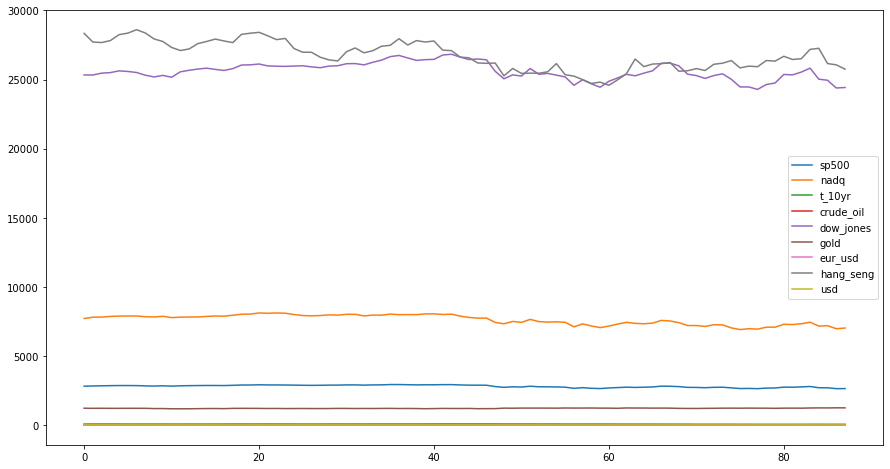

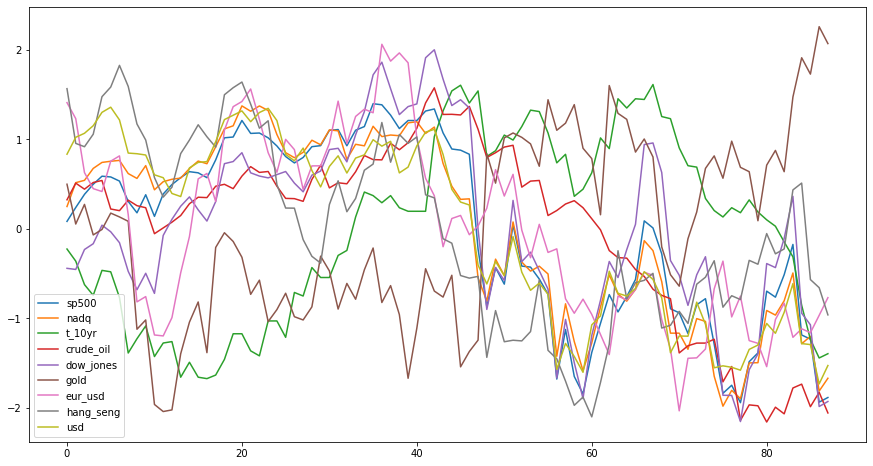

In [42]:
df = pd.read_csv(r'C:\Users\Joyce Huang\Downloads\Innovation challenge\financial.csv')
df = df.dropna()
display(df)

date = np.arange(start=0, stop=88)
sp500 = df['sp500']
nadq = df['nadq']
t_10yr = df['t_10yr']
crude_oil = df['crude_oil']
dow_jones = df['dow_jones']
gold = df['gold']
eur_usd = df['eur_usd']
hang_seng = df['hang_seng']
usd = df['usd']

fig, ax = plt.subplots(figsize=(15,8))

ax.plot(date, sp500, label='sp500')
ax.plot(date, nadq, label='nadq')
ax.plot(date, t_10yr, label='t_10yr')
ax.plot(date, crude_oil, label='crude_oil')
ax.plot(date, dow_jones, label='dow_jones')
ax.plot(date, gold, label='gold')
ax.plot(date, eur_usd, label='eur_usd')
ax.plot(date, hang_seng, label='hang_seng')
ax.plot(date, usd, label='usd')

plt.legend(loc='best')
plt.show()

#Standardize
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df = scaler.fit_transform(df.iloc[:,1:10])
df = pd.DataFrame(df)
df.columns = ['sp500','nadq','t_10yr','crude_oil','dow_jones','gold','eur_usd','hang_seng','usd']
df

date = np.arange(start=0, stop=88)
sp500 = df['sp500']
nadq = df['nadq']
t_10yr = df['t_10yr']
crude_oil = df['crude_oil']
dow_jones = df['dow_jones']
gold = df['gold']
eur_usd = df['eur_usd']
hang_seng = df['hang_seng']
usd = df['usd']

fig, ax = plt.subplots(figsize=(15,8))

ax.plot(date, sp500, label='sp500')
ax.plot(date, nadq, label='nadq')
ax.plot(date, t_10yr, label='t_10yr')
ax.plot(date, crude_oil, label='crude_oil')
ax.plot(date, dow_jones, label='dow_jones')
ax.plot(date, gold, label='gold')
ax.plot(date, eur_usd, label='eur_usd')
ax.plot(date, hang_seng, label='hang_seng')
ax.plot(date, usd, label='usd')

plt.legend(loc='best')
plt.show()